# Question 4 : Intensity transformation

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Part a

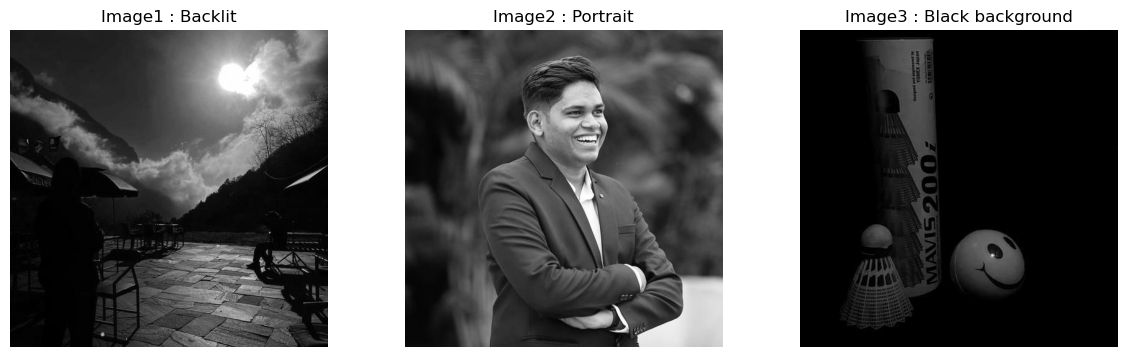

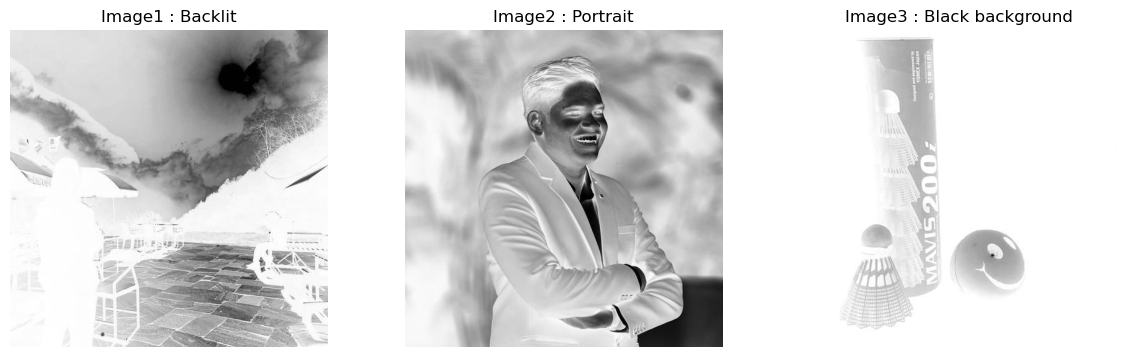

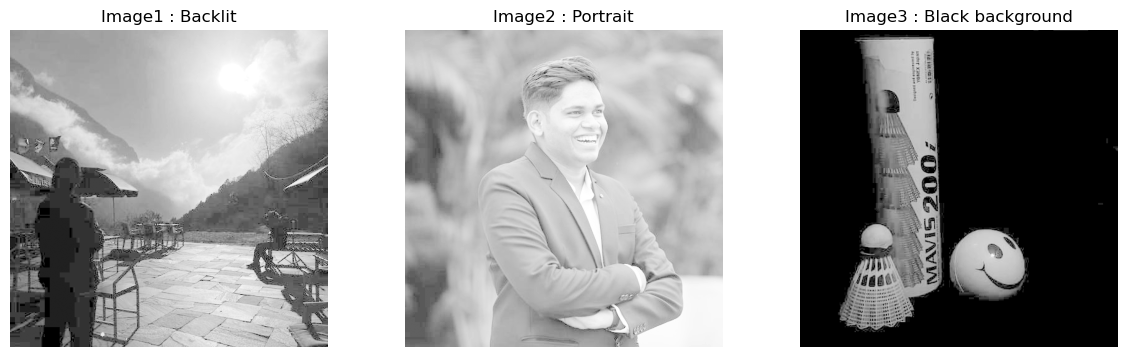

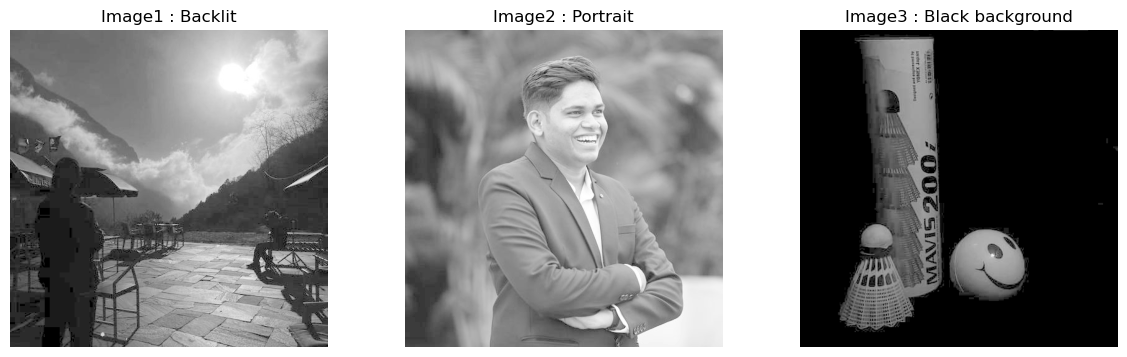

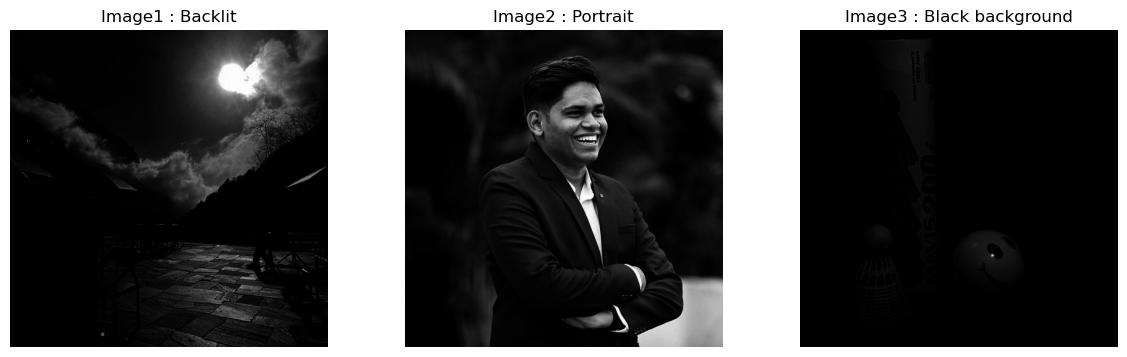

In [2]:
def plot_3images(img1, img2, img3):
    plt.figure(figsize=(12,7))
    plt.subplot(2,3,1)
    plt.imshow(img1, cmap='gray')
    plt.title(f"Image1 : Backlit")
    plt.axis('off')
    plt.subplot(2,3,2)
    plt.imshow(img2, cmap='gray')
    plt.title(f"Image2 : Portrait")
    plt.axis('off')
    plt.subplot(2,3,3)
    plt.imshow(img3, cmap='gray')
    plt.title(f"Image3 : Black background")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Load grayscale image
img1 = cv2.imread("Image1_gray.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("Image2_gray.jpg", cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread("Image3_gray.jpg", cv2.IMREAD_GRAYSCALE)

img1 = img1.astype(np.float64)
img2 = img2.astype(np.float64)
img3 = img3.astype(np.float64)

plot_3images(img1, img2, img3) ## original images

#negative transform
f1 = 255 - img1
f2 = 255 - img2
f3 = 255 - img3
plot_3images(f1, f2, f3)

#log transform
e1 = (255/np.log10(256))*np.log10(1 + img1)
e2 = (255/np.log10(256))*np.log10(1 + img2)
e3 = (255/np.log10(256))*np.log10(1 + img3)

plot_3images(e1, e2, e3)

# power law
C1 = 255/(255**0.4)
C2 = 255/(255**2.5)
h1 = C1*(img1**0.4)
h2 = C1*(img2**0.4)
h3 = C1*(img3**0.4)
g1 = C2*(img1**2.5)
g2 = C2*(img2**2.5)
g3 = C2*(img3**2.5)
plot_3images(h1, h2, h3)
plot_3images(g1, g2, g3)

## Part B

minimum pixel is  0.0  and maximum is  148.0
Dynamic Range Before Stretching: 148.0
Dynamic Range After Stretching: 255.0


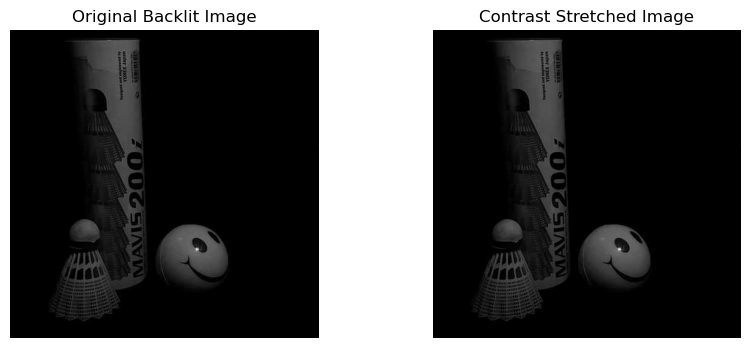

In [3]:
# Load grayscale image
img = cv2.imread("Image3_gray.jpg", cv2.IMREAD_GRAYSCALE)
img = img.astype(np.float64)

# Step 1: Find rmin and rmax
rmin = np.min(img)
rmax = np.max(img)

print(f"minimum pixel is ", rmin, " and maximum is ", rmax)

# Step 2: Contrast stretching formula
stretched = (img - rmin) * (255.0 / (rmax - rmin))

# Step 3: Dynamic range calculation
dynamic_range_before = rmax - rmin
dynamic_range_after = np.max(stretched) - np.min(stretched)

print("Dynamic Range Before Stretching:", dynamic_range_before)
print("Dynamic Range After Stretching:", dynamic_range_after)

# Step 5: Display original and enhanced images
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Backlit Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(stretched, cmap='gray')
plt.title("Contrast Stretched Image")
plt.axis('off')

plt.show()

Part C

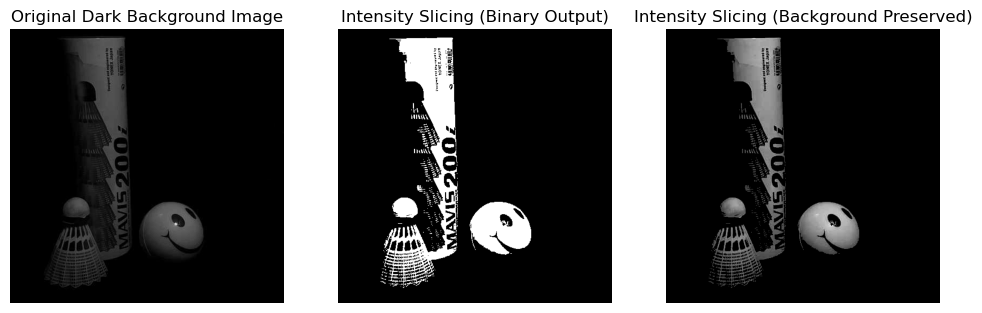

In [4]:
# Load grayscale image
img = cv2.imread("Image3_gray.jpg", cv2.IMREAD_GRAYSCALE)
img = img.astype(np.float64)

A =  20    # lower threshold
B = 80   # upper threshold

binary_slice = np.zeros_like(img)
binary_slice[(img >= A) & (img <= B)] = 255

preserve_bg = img.copy()
preserve_bg[(img < A) | (img > B)] = 0

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Dark Background Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(binary_slice, cmap='gray')
plt.title("Intensity Slicing (Binary Output)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(preserve_bg, cmap='gray')
plt.title("Intensity Slicing (Background Preserved)")
plt.axis('off')

plt.show()


Part D

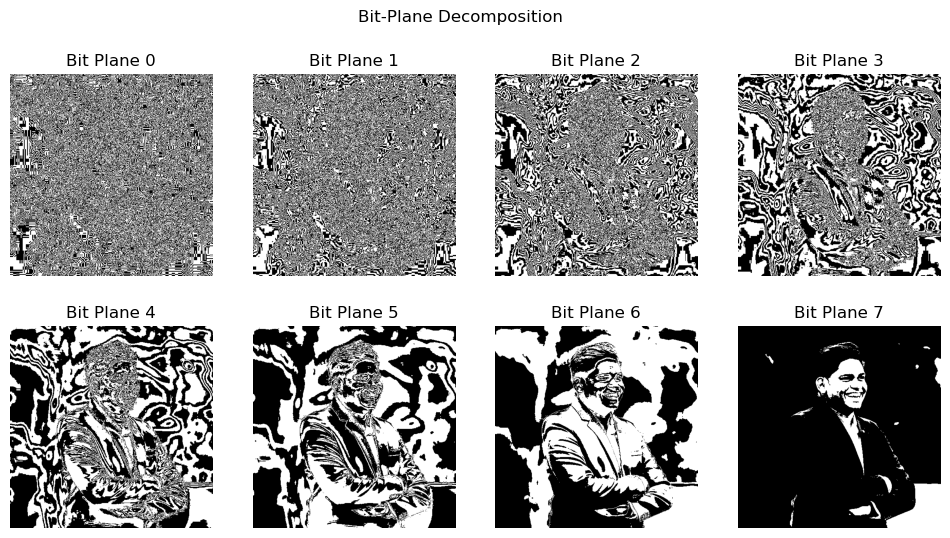

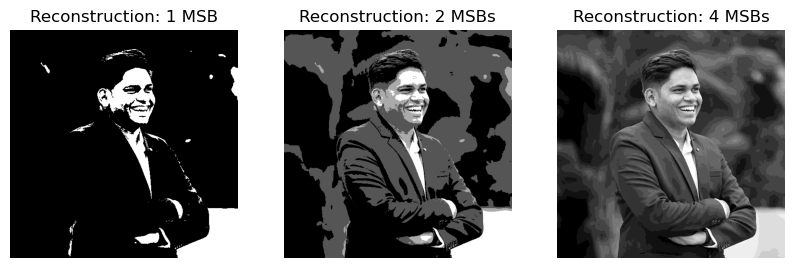

In [5]:
# Load grayscale image
img = cv2.imread("Image2_gray.jpg", cv2.IMREAD_GRAYSCALE)
img = img.astype(np.int8)

bit_planes = []
for i in range(8):
    plane = (img >> i) & 1
    bit_planes.append(plane * 255)
    
plt.figure(figsize=(12, 6))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(bit_planes[i], cmap='gray')
    plt.title(f'Bit Plane {i}')
    plt.axis('off')
plt.suptitle("Bit-Plane Decomposition")
plt.show()

# Only MSB (bit 7)
recon_1 = bit_planes[7]

# 2 MSBs (bits 7 and 6)
recon_2 = (bit_planes[7] // 255) * 128 + (bit_planes[6] // 255) * 64

# 4 MSBs (bits 7 to 4)
recon_4 = (
    (bit_planes[7] // 255) * 128 +
    (bit_planes[6] // 255) * 64 +
    (bit_planes[5] // 255) * 32 +
    (bit_planes[4] // 255) * 16
)

plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.imshow(recon_1, cmap='gray')
plt.title("Reconstruction: 1 MSB")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(recon_2, cmap='gray')
plt.title("Reconstruction: 2 MSBs")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(recon_4, cmap='gray')
plt.title("Reconstruction: 4 MSBs")
plt.axis('off')

plt.show()
